In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def generate_linear_regression_dataset(num_features = 2, n = 1000, sparse = False):
    X = np.random.uniform(low = 0, high = 1, size = (n, num_features))
    col_names = []
    for i in range(num_features):
        col_names.append('x'+str(i+1))
    df = pd.DataFrame(X, columns = col_names)
    hidden_params = np.random.uniform(low = -2, high = 2, size = (num_features+1))
    
    if(sparse):
        mask = np.random.choice(np.arange(num_features), size=int(0.5*num_features))
        hidden_params[mask] = 0
        
    hidden_params = np.round(hidden_params,2)
    df['y'] = np.matmul(df[col_names].values,hidden_params[:-1]) + hidden_params[-1]
    y = np.zeros(n)
    return df, hidden_params

In [5]:
class LinearRegression:
    def __init__(self, learning_rate  = 0.5):
        self._intercept = np.random.normal(size = 1)
        self.lr = learning_rate 
        
    def train(self, X ,y, max_iter = 1000):
        self.num_features = X.shape[1]
        self.weights = np.random.normal(size = self.num_features)
        self._intercept = np.random.normal(size = 1)
        num_iter = 0
        loss = self.MSE_Loss(y, self.predict(X))
        lossls = []
        while(num_iter < max_iter and loss > 1e-6):
            num_iter += 1
            y_pred = self.predict(X)
            gradients, gradient_intercept = self.gradient_step(X, y, y_pred)
            self.weights = self.weights - self.lr * gradients
            self._intercept = self._intercept - self.lr * gradient_intercept
            
            loss = self.MSE_Loss(y, y_pred)
            lossls.append(loss)
        print('Training Done in {} iteration'.format(num_iter))
        self.plot_loss(lossls)
        return loss
    def plot_loss(self, lossls):
        num_iter = len(lossls)
        plt.plot(np.arange(num_iter),lossls)
        plt.title('Loss over iteration')
        plt.show()
        
    def predict(self, X):
        return np.matmul(X, self.weights) + self._intercept
    
    def MSE_Loss(self, y, y_pred):
        return np.mean((y-y_pred)**2)
    
    def gradient_step(self, X, y, y_pred):
        gradients = np.zeros(self.num_features)
        gradient_intercept = np.zeros(1)
        for j in range(self.num_features):
            gradients[j] = np.mean((y_pred-y)*X[:,j])
        gradient_intercept = np.mean((y_pred-y))
        return gradients, gradient_intercept

,x1,x2,x3,x4,y
0,0.725673,0.056830,0.002078,0.006782,-1.718583
1,0.326871,0.387890,0.389956,0.282993,-1.826190
2,0.408507,0.874773,0.512962,0.069863,-0.919167
3,0.654755,0.262759,0.641772,0.908746,-3.041380
4,0.009854,0.701631,0.276577,0.301823,-1.510326


Training Done in 286 iteration


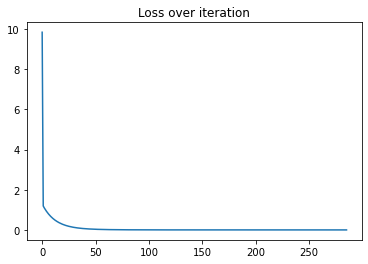

,Parameter,True Coeff,Estimated Coeff
0,x1,0.00,-0.00
1,x2,1.11,1.11
2,x3,0.00,-0.00
3,x4,-1.72,-1.72
4,intercept,-1.77,-1.77


In [6]:
df, hidden_params = generate_linear_regression_dataset(num_features = 4, n = 1000, sparse = True)
display(df[:5])
model = LinearRegression(learning_rate = 0.5)
model.train(df[df.columns[:-1]].values, df['y'].values)

estimated_params = np.round(list(model.weights)+list(model._intercept),2)
display(pd.DataFrame(zip(list(df.columns[:-1])+['intercept'], hidden_params,estimated_params), columns = ['Parameter', 'True Coeff','Estimated Coeff']))